## Diabetes Predictor

In [16]:
# Importing Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score,recall_score, precision_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
diabetes = pd.read_csv("/content/diabetes (1).csv")

In [4]:
# Separate features and labels
X = diabetes.drop(columns='Outcome', axis=1)
y = diabetes['Outcome']

In [5]:
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [7]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predict on train and test
x_train_predict = model.predict(X_train)
x_test_predict = model.predict(X_test)


**Classification report...**

In [9]:
# Accuracy
print("Accuracy on train data:", accuracy_score(y_train, x_train_predict))
print("Accuracy on test data:", accuracy_score(y_test, x_test_predict))

Accuracy on train data: 0.7850162866449512
Accuracy on test data: 0.7597402597402597


In [18]:
# F1 Score (on test data)
f1 = f1_score(y_test, x_test_predict)
print("F1 Score:", f1)


F1 Score: 0.6021505376344086


Confusion Matrix

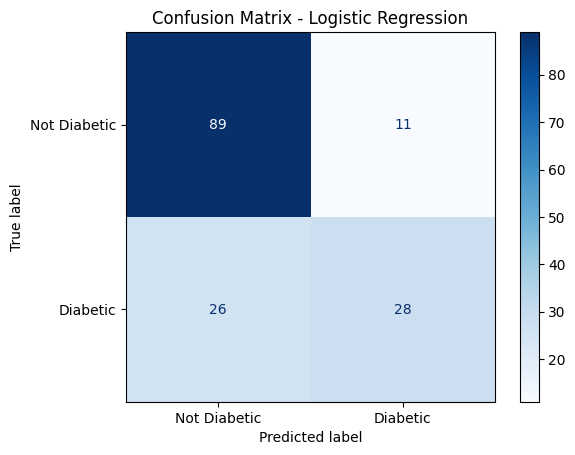

In [11]:
#Confusion Matrix
cm = confusion_matrix(y_test, x_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Confusion Matrix...**

|                          | Predicted: Not Diabetic | Predicted: Diabetic  |
| ------------------------ | ----------------------- | -------------------- |
| **Actual: Not Diabetic** | 89 (True Negatives)     | 11 (False Positives) |
| **Actual: Diabetic**     | 26 (False Negatives)    | 28 (True Positives)  |


**Interpretation**

True Negatives (TN = 89): Correctly identified as not diabetic.

False Positives (FP = 11): Actually not diabetic but predicted as diabetic.

False Negatives (FN = 26): Actually diabetic but predicted as not diabetic.

True Positives (TP = 28): Correctly identified as diabetic.



Predictive System

In [12]:
# Predictive System
input_data = (7,107,74,0,0,29.6,0.254,31)
feature_names = diabetes.drop(columns='Outcome').columns
input_df = pd.DataFrame([input_data], columns=feature_names)
std_data = scaler.transform(input_df)
prediction = model.predict(std_data)

In [13]:
print("\nPrediction:", prediction[0])
if prediction[0] == 0:
    print("The person is not diabetic...")
else:
    print("The person is diabetic...")



Prediction: 0
The person is not diabetic...
